<a href="https://colab.research.google.com/github/gianerr/CSST-101/blob/main/3B_PLATA_EXER4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1: Setting Up the Environment

In [1]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.2 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination
from pgmpy.inference import BeliefPropagation
from pgmpy.factors.discrete import TabularCPD

# Exercise 2: Building a Simple Bayesian Network

In [3]:
model = BayesianNetwork([('Weather', 'Traffic'), ('Traffic', 'Late')])

In [4]:
cpd_weather = TabularCPD(variable= 'Weather', variable_card=2, values=[[0.8], [0.2]])

In [5]:
cpd_traffic = TabularCPD(variable='Traffic', variable_card=2,
                         values=[[0.9, 0.5], [0.1, 0.5]],
                         evidence=['Weather'],
                         evidence_card=[2])

In [6]:
cpd_late = TabularCPD(variable='Late', variable_card=2,
                      values=[[0.95, 0.4], [0.05, 0.6]],
                      evidence=['Traffic'],
                      evidence_card=[2])

In [7]:
model.add_cpds(cpd_weather, cpd_traffic, cpd_late)

In [8]:
assert model.check_model

# Exercise 3: Querying the Bayesian Network

In [9]:
inference = VariableElimination(model)

result = inference.query(variables=['Late'], evidence={'Weather': 1})
print(result)

+---------+-------------+
| Late    |   phi(Late) |
+=========+=============+
| Late(0) |      0.6750 |
+---------+-------------+
| Late(1) |      0.3250 |
+---------+-------------+


# Exercise 4: Parameter Learning

In [10]:
data = pd.DataFrame({
    'Weather': np.random.choice([0,1], size=1000, p=[0.8, 0.2]),
    'Traffic': np.nan,
    'Late': np.nan
})

data.loc[data['Weather'] == 0, 'Traffic'] = np.random.choice(
    [0,1],
    size=data[data['Weather'] == 0].shape[0],
    p=[0.9, 0.1]
)

data.loc[data['Weather'] == 1, 'Traffic'] = np.random.choice(
    [0, 1],
    size=data[data['Weather'] == 1].shape[0],
    p=[0.5, 0.5]
)

data['Late'] = np.where(
    data['Traffic'] == 0,
    np.random.choice([0, 1], size=data.shape[0], p=[0.95, 0.05]),
    np.random.choice([0, 1], size=data.shape[0], p=[0.4, 0.6])
)

In [11]:
from pgmpy.estimators import MaximumLikelihoodEstimator

model = BayesianNetwork([('Weather', 'Traffic'), ('Traffic', 'Late')])
model.fit(data, estimator=MaximumLikelihoodEstimator)

for cpd in model.get_cpds():
  print(cpd)

+------------+-------+
| Weather(0) | 0.809 |
+------------+-------+
| Weather(1) | 0.191 |
+------------+-------+
+--------------+---------------------+--------------------+
| Weather      | Weather(0)          | Weather(1)         |
+--------------+---------------------+--------------------+
| Traffic(0.0) | 0.9097651421508035  | 0.4607329842931937 |
+--------------+---------------------+--------------------+
| Traffic(1.0) | 0.09023485784919653 | 0.5392670157068062 |
+--------------+---------------------+--------------------+
+---------+---------------------+---------------------+
| Traffic | Traffic(0.0)        | Traffic(1.0)        |
+---------+---------------------+---------------------+
| Late(0) | 0.9453883495145631  | 0.39204545454545453 |
+---------+---------------------+---------------------+
| Late(1) | 0.05461165048543689 | 0.6079545454545454  |
+---------+---------------------+---------------------+


# Exercise 5: Visualizing the Bayesian Network

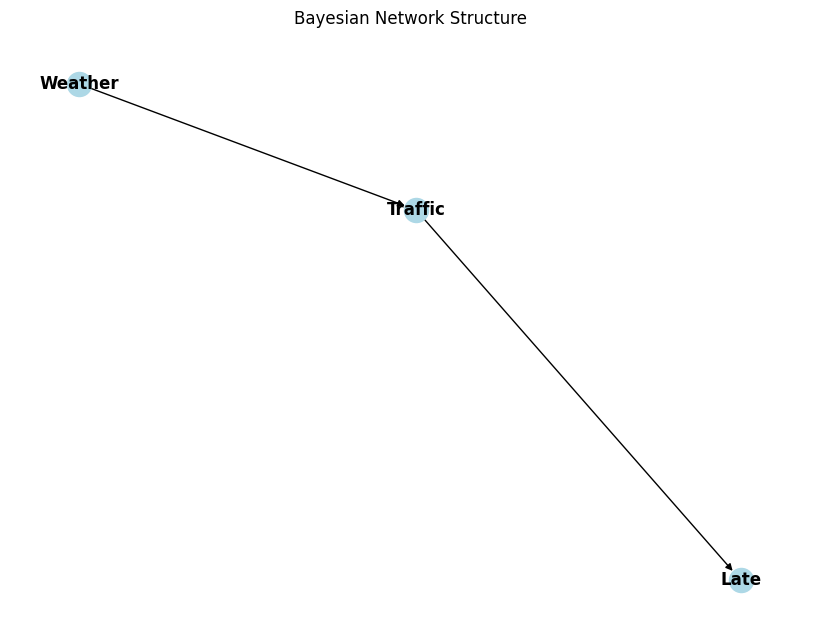

In [12]:
import matplotlib.pyplot as plt
import networkx as nx

nx_graph = nx.DiGraph(model.edges())
plt.figure(figsize=(8,6))
pos = nx.spring_layout(nx_graph)
nx.draw(
    nx_graph, pos,
    with_labels=True, node_color='lightblue',
    font_weight='bold', arrows=True
)
plt.title('Bayesian Network Structure')
plt.show()